# 2019.11.24. 딥-러닝 과정 CNN

# 세번째 실습. Keras 모델 생성/학습 - Fashion MNIST : CNN
[Keras Dataset](https://keras.io/ko/datasets/#-mnist)

## 1. 데이터 불러오기


In [29]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


-> validation dataset을 꼭 사용하지 않아도 괜찮음

## 2. 이미지 데이터 확인하기 🖼


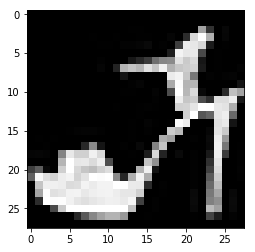

In [30]:
import matplotlib.pyplot as plt

image = X_train[9]

plt.imshow(image, cmap=plt.cm.gray)

## 3-1. 이미지 데이터 전처리 : 2차원 -> 3차원 🌟🌟🌟


In [31]:
w = h = 28
X_train = X_train.reshape((X_train.shape[0], w, h, 1))
X_test = X_test.reshape((X_test.shape[0], w, h, 1))

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## 3-2. 이미지 데이터 전처리 : Normalzation 


In [32]:
print(X_train[9])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  1]
  [  1]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [164]
  [ 50]
  [  0]
  [  7]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  1]
  [  0]
  [  0]
  [  1]
  [  0]
  [  0]
  [  1]
  [  1]
  [  0]
  [  0]
  [  5]
  [  0]
  [ 45]
  [217]
  [255]
  [176]
  [  0]
  [  6]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  1]
  [  1]
  [  0]


In [33]:
X_train = X_train/255.0
X_test = X_test/255.0

In [34]:
print(X_train[9])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

## 4. Label categorical (one-hot encoding) 


In [35]:
print(y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


In [36]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## 5. 모델 생성 : CNN


In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu', 
                 input_shape=(28, 28, 1)))

model.add(MaxPool2D(pool_size=(2,2))) # 전체 사이즈의 1/2, 1/2로 축소

model.add(Flatten())

model.add(Dense(units=128, activation='relu')) 
model.add(Dense(10, activation='softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________
None


## 6. Compile - Optimizer, Loss function 설정


In [38]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

## 7. 모델 학습시키기


In [39]:
batch_size = 128
epochs = 10

hist = model.fit(X_train, y_train,
                 epochs=epochs,
                 batch_size=batch_size,
                 verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.4496 - acc: 0.8425
Epoch 2/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.3075 - acc: 0.8897
Epoch 3/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.2612 - acc: 0.9061
Epoch 4/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.2312 - acc: 0.9167
Epoch 5/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.2094 - acc: 0.9233
Epoch 6/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.1892 - acc: 0.9307
Epoch 7/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.1730 - acc: 0.9363
Epoch 8/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.1585 - acc: 0.9425
Epoch 9/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.1431 - acc: 0.9484
Epoch 10/10
60000/60000 [=========

## 8. 모델 평가하기


In [40]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(test_loss, test_acc)

10000/10000 [==============================] - 1s 125us/step
0.2573951632916927 0.9121


## 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼


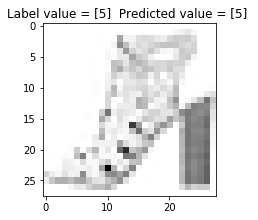

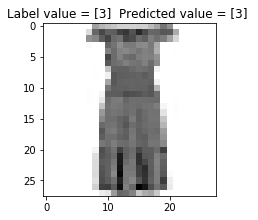

In [44]:
import numpy
for index in numpy.random.choice(len(y_test), 2, replace = False):
    predicted = model.predict(X_test[index:index + 1])[0]
    label = y_test[index]
    result_label = numpy.where(label == numpy.amax(label))
    result_predicted = numpy.where(predicted == numpy.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (result_label[0], result_predicted[0])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = X_test
    plt.imshow(images[index].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()

## 10. 학습 시각화하기


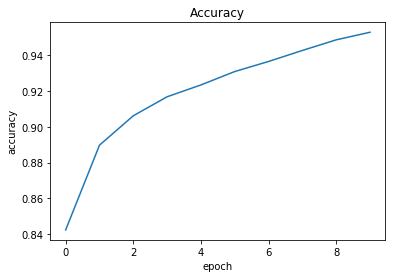

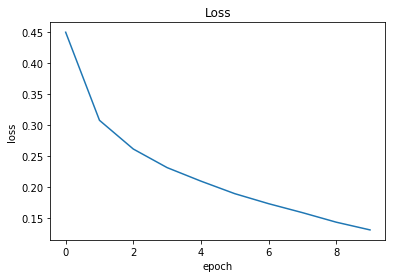

In [43]:
plt.plot(hist.history['acc'])
#plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
#plt.legend(['train','val'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.legend(['train','val'], loc='upper left')
plt.show()